### **Twitter(rebranded as X) US Airlines Sentiment Prediction**

### **OBJECTIVE:**
- To predict category for the `sentiment of tweets` into three categories: `positive`, `negative', and 'neutral`

In [1]:
# !pip install contractions
# pip install bs4

# **Libraries**

In [2]:
# classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup

# Nlp libraries
import nltk
from nltk.tokenize import word_tokenize # Tokenize
from nltk.corpus import stopwords       # Stopwords
from nltk.stem import WordNetLemmatizer # Lemmetization

nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **EDA**

In [3]:
# Load Data
df = pd.read_csv("Tweets.csv")
df.sample(10).T

,4815,7710,11256,8408,13544,12814,12340,9430,4810,7958
tweet_id,569701794714128384,569327066887401473,568274949275824128,568416873211015168,569837152332333056,570010327036735488,570224942681206786,569940462678749186,569704587315138560,568929608566837249
airline_sentiment,negative,negative,negative,neutral,negative,negative,negative,negative,positive,positive
airline_sentiment_confidence,1.0,1.0,1.0,0.6739,1.0,0.659,0.6578,0.7128,1.0,1.0
negativereason,Customer Service Issue,Customer Service Issue,Customer Service Issue,NaN,Customer Service Issue,Lost Luggage,Bad Flight,Late Flight,NaN,NaN
negativereason_confidence,1.0,0.3606,0.6642,NaN,1.0,0.3415,0.3498,0.7128,NaN,NaN
airline,Southwest,Delta,US Airways,Delta,American,American,American,US Airways,Southwest,Delta
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,zarrylarou,SpedAdvocates,ContentFac,GerryBorrego,thelyandre,Princessk91,Rachelgaffney,EmmaJLogue,sahandmirza,greggweiss
negativereason_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# null values
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


#### `There are no missing records for the columns of our model importance` - `text`(input) `and airline_sentiment`(target)

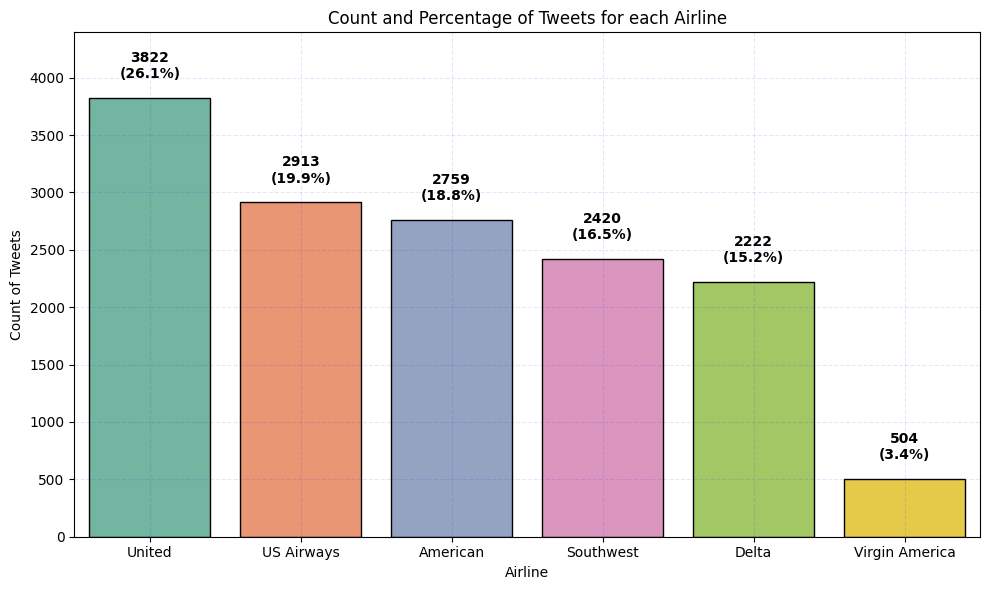

In [6]:
# Count and percentage of tweets per airline
airline_counts = df['airline'].value_counts()
total = airline_counts.sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=airline_counts.index, y=airline_counts.values, hue=airline_counts.index, palette='Set2',legend=False, edgecolor = 'black')
plt.title('Count and Percentage of Tweets for each Airline')
plt.xlabel('Airline')
plt.ylabel('Count of Tweets')
plt.grid(True, linestyle='--', alpha=0.1, color='blue')

# Annotations: Count + %
for i, (count, airline) in enumerate(zip(airline_counts.values, airline_counts.index)):
    percentage = f"{(count / total) * 100:.1f}%"
    ax.text(i, count + total * 0.01, f"{count}\n({percentage})",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Extend y-axis limit to make space for annotations
plt.ylim(0, max(airline_counts.values) * 1.15)

plt.tight_layout()
plt.show()


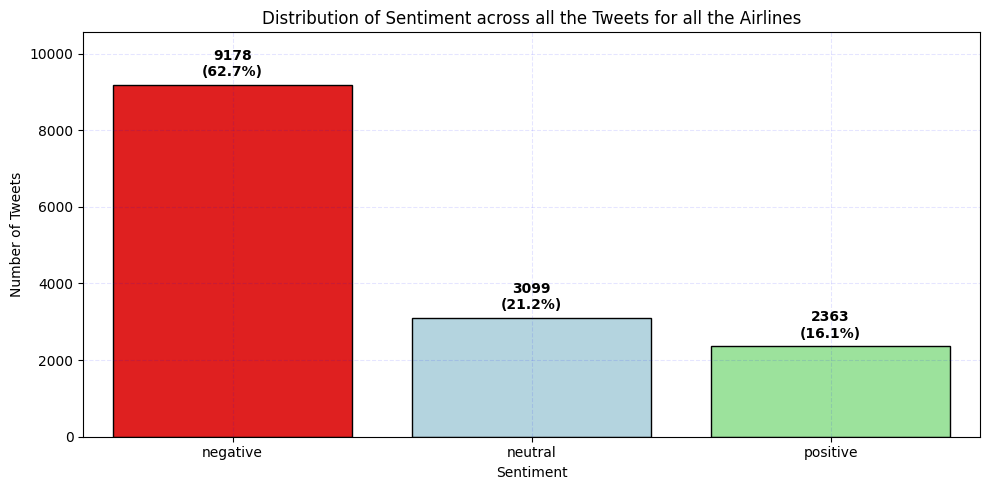

In [7]:
# Distribution of Sentiment across all the tweets for all the airlines
sentiment_counts = df['airline_sentiment'].value_counts()

plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values, hue=sentiment_counts.index, palette=['Red','LightBlue','LightGreen'],legend=False, edgecolor = 'black')
plt.title('Distribution of Sentiment across all the Tweets for all the Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.grid(True, linestyle='--', alpha=0.1, color='blue')

# Annotations: Count + %
for i, (count, sentiment) in enumerate(zip(sentiment_counts.values, sentiment_counts.index)):
    percentage = f"{(count / total) * 100:.1f}%"
    plt.text(i, count + total * 0.01, f"{count}\n({percentage})",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, max(sentiment_counts.values) * 1.15)
plt.tight_layout()
plt.show()

- **Majority of the tweets are negative `(63%)`, followed by neutral tweets (21%), and then the positive tweets (16%)**

- Its common for people to get on `Twitter (now X)` and rant about bad **customer service**

In [8]:
# sample tweets in readale format
df['text'].sample(15).to_list()

['@USAirways has an SPF record error that is causing e-mail from noreply@usairwaysmobile.com to go to spam filters. DNS admin needs to fix!',
 '@USAirways now on hold for 90 minutes',
 "“@JetBlue: Our fleet's on fleek. http://t.co/CXTTxV2lMP” 😒",
 "@USAirways how is it possible that you don't have a call back service? An automated message telling us to call back Late Flightr is so unhelpful.",
 "@JetBlue Thank you for the reply. Would've appreciated communication before checking in about the delay. JetBlue used to be my go-to",
 "@JetBlue where did my travel bank credit go?  I can't call you right now.",
 '@SouthwestAir I notice that there are separate buttons for "guitar" and actual "music" in this pic. Some bands should take note of this.',
 '@united thanks! We would like an apology and a full refund. Please confirm when we will receive.',
 '@united   Pushing 2 hours on hold. Priceless. http://t.co/thS10LDY2a',
 "@SouthwestAir hey... Why don't you add the intl number to your error wh

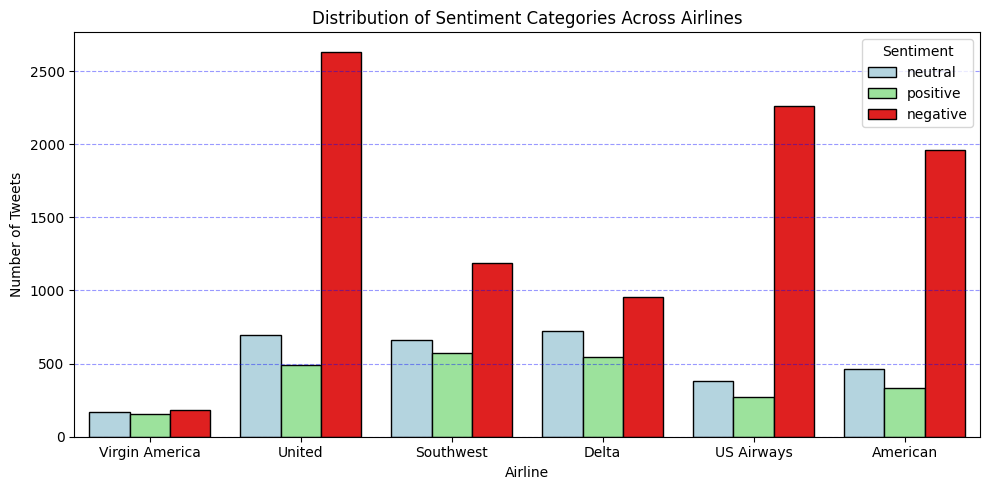

In [9]:
# Distribution of Sentiment categories across all the airlines
plt.subplots(figsize=(10, 5))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette=['lightblue','lightGreen','Red'], edgecolor = 'black')
plt.title('Distribution of Sentiment Categories Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.4, color = 'blue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- **Majority of the negative tweets are coming for `United` & `US Airways`**

- `Virgin America` airline is probably the only airline where the ratio of **three sentiment categories is somewhat similar** however they are the smallest airline company

- `Delta` & `Southwest` airlines have relatively **less negative tweets** in proportion compared to others

In [10]:
df['negativereason'].value_counts()

,count
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


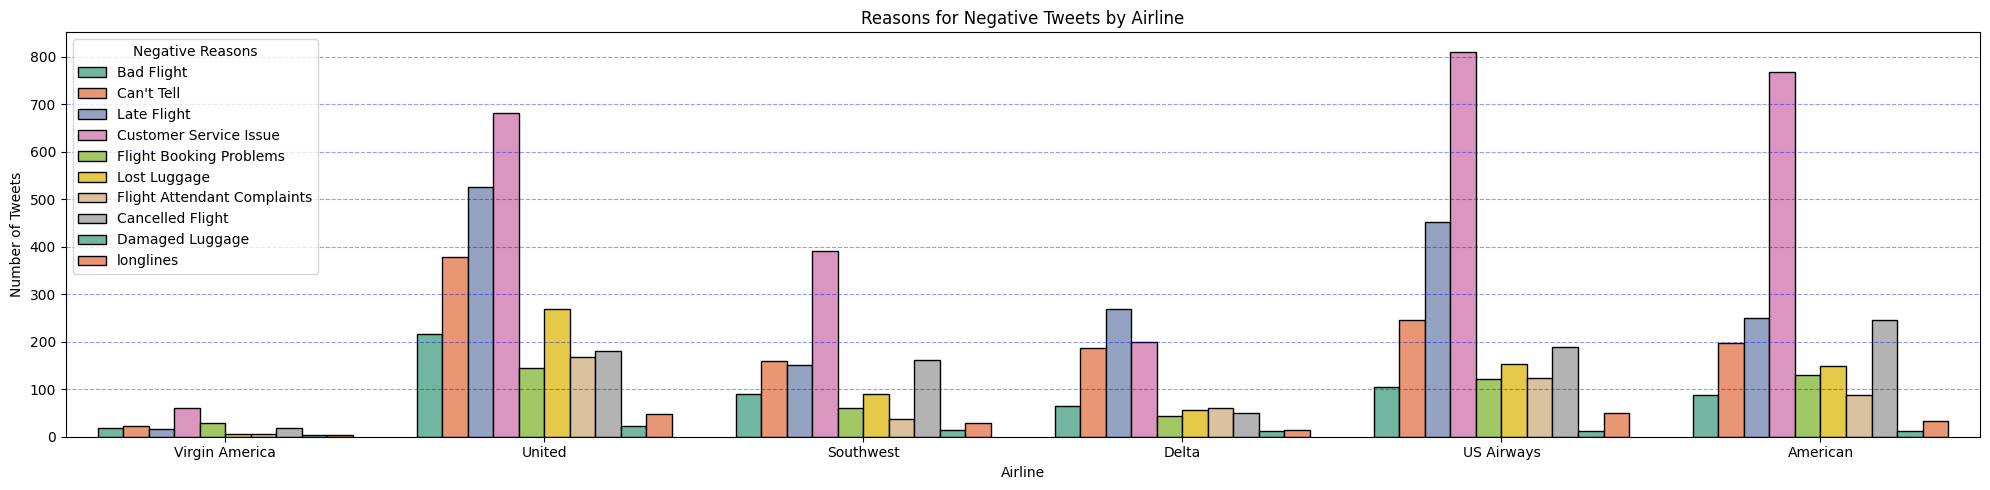

In [11]:
# plot different negative reasons for each airline in one graph
plt.figure(figsize=(20, 5))
sns.countplot(x='airline', hue='negativereason', data=df, palette='Set2', edgecolor='black')
plt.title('Reasons for Negative Tweets by Airline')
plt.ylabel('Number of Tweets')
plt.xlabel('Airline')
plt.legend(title='Negative Reasons')
plt.grid(axis='y', linestyle='--', alpha=0.4, color='blue')
plt.tight_layout()
plt.show()

## Word cloud for each of the class of `Sentiment Category`
- A word cloud is a `visual` representation of text data where each word indicates its frequency or importance within a given text or set of texts

 - Higher the frequency of the word --> bigger the font size of the word in the cloud

In [12]:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [13]:
neg_df = df[df['airline_sentiment']=='negative'] # filtering out only the negative sentiment tweets
pos_df = df[df['airline_sentiment']=='positive'] # filtering out only the positive sentiment tweets

In [14]:
neg_df.shape, pos_df.shape

((9178, 15), (2363, 15))

In [15]:
neg_words = ' '.join(neg_df['text']) #combines all the tweets of the airline passengers into a single string, where each tweet is separated by space
pos_words = ' '.join(pos_df['text'])

In [16]:
neg_words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

In [17]:
cleaned_text_neg = " ".join([word for word in neg_words.split() #split the text into words
                         if 'http' not in word #filter out any word that contains http
                         and not word.startswith('@') #or start with @ and
                         and word !='RT' #retweets
                         ])

In [18]:
cleaned_text_neg

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [19]:
cleaned_text_pos = " ".join([word for word in pos_words.split() #split the text into words
                         if 'http' not in word #filter out any word that contains http
                         and not word.startswith('@') #or start with @ and
                         and word !='RT' #retweets
                         ])

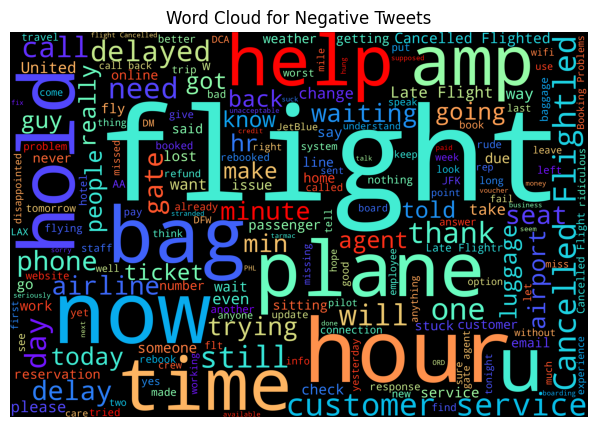

In [20]:
wordcloud_neg = WordCloud(stopwords=STOPWORDS, #exclude all the common stopwords
                      background_color='black',
                      width=3000,
                      height=2000,
                      colormap='rainbow'
                      ).generate(cleaned_text_neg)

plt.figure(figsize=(12,5))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

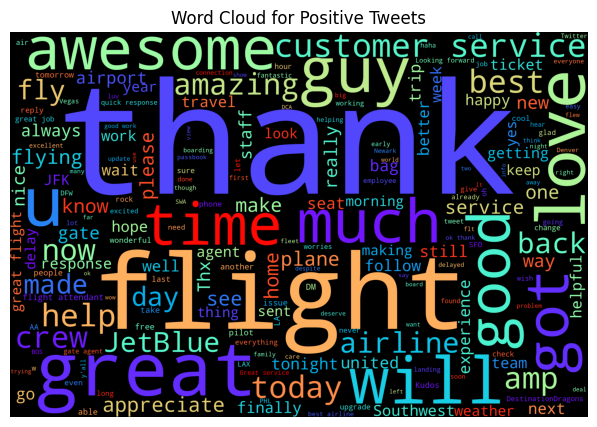

In [21]:
wordcloud_pos = WordCloud(stopwords=STOPWORDS, #exclude all the common stopwords
                      background_color='black',
                      width=3000,
                      height=2000,
                      colormap='rainbow'
                      ).generate(cleaned_text_pos)

plt.figure(figsize=(12,5))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

In [22]:
# Count total number of words in the cleaned_text_neg
print("Total Word Count negative:", len(cleaned_text_neg.split()))
print("Total Word Count positive:", len(cleaned_text_pos.split()))

Total Word Count negative: 170093
Total Word Count positive: 30223


In [23]:
from collections import Counter
word_frequency = Counter(cleaned_text_neg.split())

In [24]:
word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency'])
word_frequency_df_sorted = word_frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [25]:
print("Word Frequency of negative sentiments")
word_frequency_df_sorted

Word Frequency of negative sentiments


,Word,Frequency
0,to,5966
1,the,3929
2,I,3375
3,a,3087
4,and,2685
...,...,...
20460,"5:30,",1
20461,sests.,1
20462,"""No"".",1
20463,everytime.,1


- Unique count of words - 20465

# Data pre-processing steps

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

In [26]:
df['text']

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


## Remove **html** tags

In [27]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [28]:
df['text'] = df['text'].apply(lambda x:strip_html(x)) # lambda function takes the entry and passes to strip_html function to remove html tags

In [29]:
df['text']

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


## Replace contractions in string (e.g., replace `I'm --> I am`, `We'll --> We will`) and so on

In [30]:
def replace_contractions(text):
    '''
    Replace contractions in string of text
    don't --> do not
    '''
    return contractions.fix(text)

In [31]:
df['text'] = df['text'].apply(lambda x:replace_contractions(x)) # lambda function takes the entry and passes to fix contractions in the tweets

In [32]:
df['text']

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you have added commercials...
2,@VirginAmerica I did not today... Must mean I ...
3,@VirginAmerica it is really aggressive to blas...
4,@VirginAmerica and it is a really big bad thin...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


## Remove numbers

In [33]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

- `re.sub(pattern, replacement, string)`: This function replaces `occurrences of a pattern` in the given string with a `replacement string`.

- `''`: empty string

In [34]:
df['text'] = df['text'].apply(lambda x:remove_numbers(x)) # lambda function takes the entry and removes numbers from the tweets

In [35]:
df['text']

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you have added commercials...
2,@VirginAmerica I did not today... Must mean I ...
3,@VirginAmerica it is really aggressive to blas...
4,@VirginAmerica and it is a really big bad thin...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over minutes Late Flight...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


## Create functions for removing non-ascii characters, lowercase conversion, removing punctuations, removing stopwords, lemmatization

In [36]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

In [37]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """
    Remove non-ASCII characters from list of tokenized words

    1. unicodedata.normalize('NFKD', word)
    Normalization Form KD (Compatibility Decomposition):
    This decomposes characters into base characters and diacritical marks.
    Example: "café" becomes 'e' + '´'

    2. .encode('ascii', 'ignore')
    Converts the string into a byte string using ASCII encoding.
    Ignores any non-ASCII characters (like accents, emojis, etc.).
    'é' or '😊' will be removed because they're not ASCII.

    3. .decode('utf-8', 'ignore')
    Converts the byte string back to a normal UTF-8 string.
    ignore ensures that any decoding errors are skipped.
    """
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word) # [^\w\s] means "any character that is NOT a word character or whitespace", we are replacing these characters with ''
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords_set:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words


In [38]:
# Example
remove_non_ascii(['café', 'naïve', 'résumé', 'hello'])

['cafe', 'naive', 'resume', 'hello']

In [39]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ''.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)

In [40]:
df.sample(10).T

,3600,11514,12555,4997,10764,12741,10492,14311,2255,5726
tweet_id,568241367396192256,568058820376854528,570106218825564161,569558600353390592,568897700315435008,570040903735373825,569252439548952576,569636885863251969,569294326259253248,568776728333541376
airline_sentiment,neutral,negative,negative,positive,neutral,neutral,negative,negative,negative,neutral
airline_sentiment_confidence,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6831,0.3469
negativereason,NaN,Bad Flight,Customer Service Issue,NaN,NaN,NaN,longlines,Customer Service Issue,Late Flight,NaN
negativereason_confidence,NaN,1.0,1.0,NaN,NaN,NaN,0.3434,0.3694,0.3569,0.0
airline,United,US Airways,American,Southwest,US Airways,American,US Airways,American,United,Southwest
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,STLStude,claytonconway,richfreed,justatinydragon,MikeSelesky,chaigen1,OthalieGraham,georgetietjen,ByronJ,Milwaukette
negativereason_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,1,0,0,0,0,0,0,0


# Build the model based on **countvectorizer** and **Random Forest**

In [41]:
### Vectorization : Convert text data into numbers
from sklearn.feature_extraction.text import CountVectorizer #to convert a collection of text docs into a matrix of token counts

In [42]:
Count_vec = CountVectorizer(max_features=50000) #keeping only 5000 features as more number of features will increase the processing time
data_features = Count_vec.fit_transform(df['text'])

data_features_array = data_features.toarray()

`max_features`: signifies the unique number of features (i.e., unique words or tokens) --> 5000
    
- Keekping the limit to 5000, it ensures that only top 5000 most frequent words are kept in the model

In [43]:
X = data_features # training features
y = df.airline_sentiment #training target

In [44]:
### Spilt data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Model


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nlp_rf = RandomForestClassifier(n_estimators=100, n_jobs=6)

### Training the model
nlp_rf = nlp_rf.fit(X_train, y_train)

In [46]:
np.mean(cross_val_score(nlp_rf, X,y, cv=5))

0.6992486338797814

In [47]:
### Generate accuracy on the test set
from sklearn.metrics import accuracy_score
print(nlp_rf.score(X_test, y_test))
print(accuracy_score(y_test, nlp_rf.predict(X_test)))

0.767304189435337
0.767304189435337


# **Create the same model using Word2Vec**

In [48]:
#!pip install gensim

In [50]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Tokenize text for Word2Vec
tokenized = [text.split() for text in df['text']]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2, workers=4, seed=42)

# Average Word2Vec vector for each document
def document_vector(doc):
    # Check if doc is empty to avoid issues with np.mean
    if not doc:
        return np.zeros(w2v_model.vector_size)
    # Filter out words not in the vocabulary before averaging
    word_vectors = [w2v_model.wv[word] for word in doc if word in w2v_model.wv]
    # Check if word_vectors is empty after filtering
    if not word_vectors:
        return np.zeros(w2v_model.vector_size)
    return np.mean(word_vectors, axis=0)


X_w2v = np.array([document_vector(doc) for doc in tokenized])
X_w2v = np.nan_to_num(X_w2v)  # Replace NaN with 0s

# Train-test split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, df['airline_sentiment'], test_size=0.2, random_state=42)

# Random Forest Model (as used in your original code)
model = RandomForestClassifier(n_estimators=100, n_jobs=6)
model.fit(X_train_w2v, y_train_w2v)

# Evaluation
y_pred_w2v = model.predict(X_test_w2v)
print(classification_report(y_test_w2v, y_pred_w2v))

              precision    recall  f1-score   support

    negative       0.75      0.94      0.83      1889
     neutral       0.56      0.31      0.40       580
    positive       0.71      0.38      0.50       459

    accuracy                           0.73      2928
   macro avg       0.67      0.54      0.58      2928
weighted avg       0.71      0.73      0.69      2928

